Body brain weights outliers
---

Exercise: Load an plot the data
---

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
# Load data
data_df = pd.read_csv(os.path.join('data', 'bodybrain-weights.csv'))


In [2]:
data_df.head()

,body,brain,label
0,36330.0,119.5,Grey wolf
1,3000.0,25.0,Echidna
2,27660.0,115.0,Goat
3,9400000.0,70.0,Triceratops
4,3600.0,21.0,Rock hyrax-b


In [3]:
x = data_df.body.values
y = data_df.brain.values

# Rescale them
x_log = np.log(x)
y_log = np.log(y)

In [4]:
x_log[1]

8.006367567650246

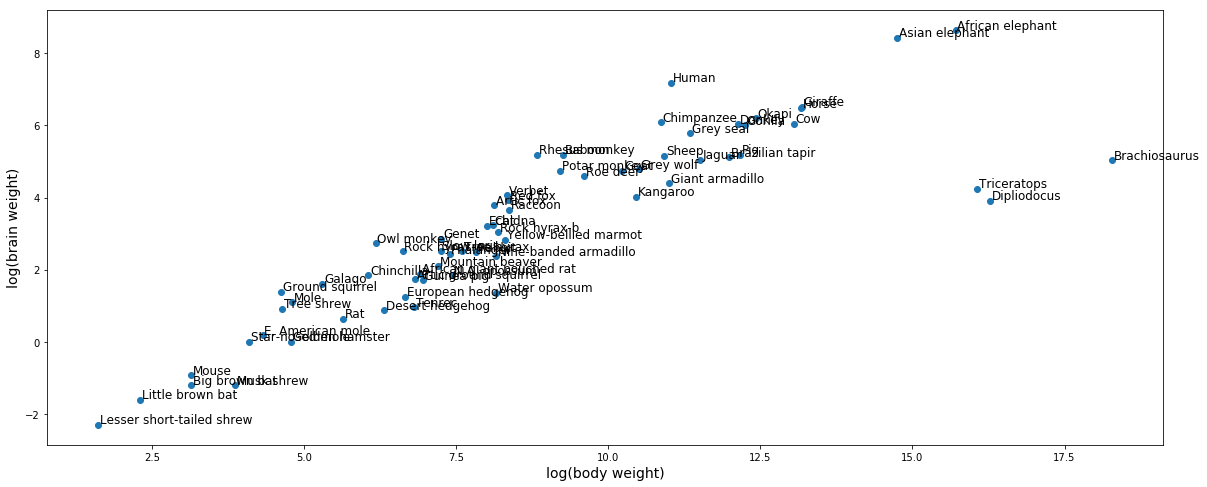

In [5]:
# Plot x_log/y_log
plt.figure(figsize=(20,8))
plt.scatter(x_log, y_log)
for i in range(len(data_df.label)):
    plt.text(x_log[i]+0.03, y_log[i]+0.03, data_df.label[i], fontsize=12)
plt.xlabel('log(body weight)', fontsize=14)
plt.ylabel('log(brain weight)', fontsize=14)
plt.show()

Exercise: Filter outliers and fit a linear regression
---

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

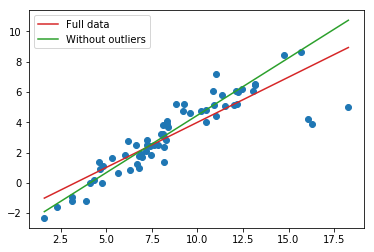

In [19]:
# (A) Fit a linear regression using all the data points
x_values=np.linspace(min(x_log), max(x_log), num=100)
coefs1=np.polyfit(x_log,y_log,deg=1)
y_values1=np.polyval(coefs1, x_values)
# (B) Filter the three outliers
idx = ((x_log >15 ) & (y_log > 2) & (y_log<7))
x2, y2 = x_log[~idx], y_log[~idx]

# (C) Fit a linear regression using the rest of the data points
coefs2=np.polyfit(x2,y2,deg=1)
y_values2=np.polyval(coefs2, x_values)

# (D) Plot the two models
plt.scatter(x_log,y_log)
plt.plot(x_values, y_values1, c='C3', label='Full data')
plt.plot(x_values, y_values2, c='C2', label='Without outliers')
plt.legend()
plt.show()

In [48]:
data_df.label[idx]

3       Triceratops
9       Dipliodocus
24    Brachiosaurus
Name: label, dtype: object

Exercise: Fit a linear regression using Huber loss
---

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

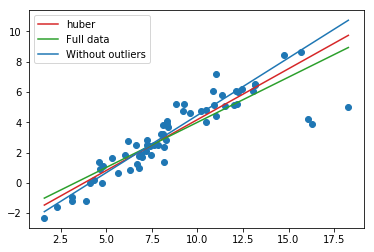

In [20]:
# Fit a linear regression using Huber loss
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor
lr_huber= SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=1000, tol=1e-3)
x_h=scale(x_log)
y_h=y_log

lr_huber.fit(x_h[:, np.newaxis],y_h);
x_values_huber= np.linspace(min(x_h), max(x_h), num=100)
y_values_huber= lr_huber.predict(x_values_huber[:, np.newaxis])
# Plot the prediction line
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_log,y_h)
plt.plot(x_values, y_values_huber, c='C3', label='huber')
plt.plot(x_values, y_values1, c='C2', label='Full data')
plt.plot(x_values, y_values2, c='C0', label='Without outliers')
plt.legend()
plt.show()

Exercise: Comptue the *Encephalization Quotient (EQ)*
---

We saw that the equation of a simple linear regression for variables on a logarithmic scale: $\log\left(y\right)=a\log\left(x\right)+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weights. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [85]:
coefs2

array([ 0.75836799, -3.12333267])

In [88]:
np.exp(6)

403.4287934927351

In [90]:
# (A) Create a and c values
a = coefs2[0]
c = np.exp(coefs2[1])

# (B) Compute predicted brain weights
y_pred = c * x ** a

# (C) Compute EQ
data_df['EQ'] = y/y_pred

# (D) Print the five largest quotients
sort_by_EQ=data_df.sort_values(by=[data_df.EQ],axis=1, ascending=True)
print(data_df)

KeyError: 0     0.945050
1     1.310535
2     1.118370
3     0.008191
4     0.958693
5     0.503689
6     2.128638
7     2.419201
8     0.508063
9     0.004956
10    0.778012
11    0.632232
12    2.043566
13    0.728354
14    0.402747
15    0.361883
16    1.783770
17    0.709768
18    0.434205
19    2.644971
20    1.248411
21    2.744688
22    3.261447
23    0.876911
24    0.003344
25    0.858046
26    3.625807
27    1.532137
28    0.687418
29    0.339638
        ...   
35    0.795951
36    0.897465
37    1.677771
38    1.476863
39    0.953581
40    2.034169
41    0.507151
42    0.437859
43    0.576111
44    0.483918
45    1.567279
46    0.792699
47    0.601663
48    6.960230
49    1.626362
50    1.031908
51    1.167974
52    2.359951
53    1.349012
54    0.643854
55    0.732283
56    0.602090
57    5.044836
58    1.449973
59    0.705455
60    0.842976
61    0.670455
62    0.956067
63    1.003608
64    0.455573
Name: EQ, Length: 65, dtype: float64